In [1]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def show(img, cvt=cv2.COLOR_GRAY2RGB, do_cvt=True):
    plt.figure(figsize=(10,10))
    if do_cvt: plt.imshow(cv2.cvtColor(img, cvt))
    else: plt.imshow(img)

[(484, 763, 141, 30), (481, 634, 252, 34), (477, 517, 226, 35), (109, 462, 21, 37), (477, 400, 338, 34), (183, 372, 30, 37), (250, 308, 29, 37), (477, 270, 263, 34), (312, 247, 30, 36), (478, 144, 208, 34), (477, 20, 127, 33)]


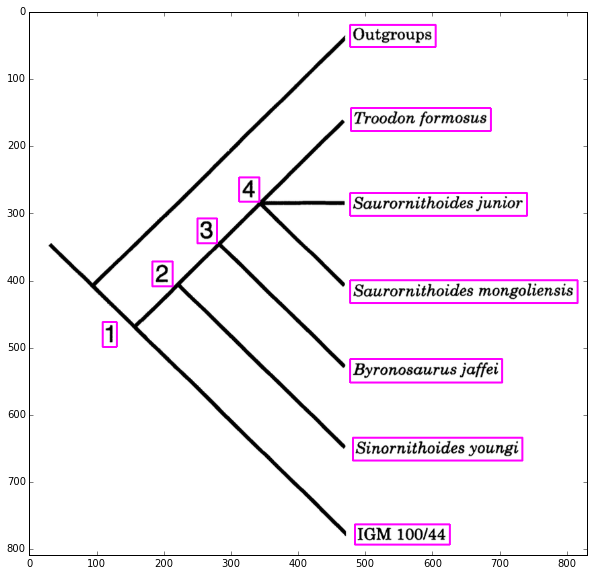

In [4]:
just_tree = cv2.imread("images/Tree1.png")
#label_rectangles
#input: png image of the tree, user defined parameter k

#Parameter k: 
#adjust k higher so that phrases are connected, but lower such that all phrases are separate from the tree. for tree 1, use k=12. for tree_image_ref, use k=9 

#output: (image, list of rectangles in the format (x,y,w,h))

def label_rectangles(img, thresh=0.5, k=12, iterations=1):
    img = img.copy()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    
    #set the amount to dilate to merge words in a phrase together
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(k,k))
    dilated = cv2.dilate(thresh,kernel,iterations)
    im2, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
    #get the rectangle boundaries we want
    heights = []
    rectangles = []
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        if h < 5 or w < 5: continue
        #if h > grays[i].shape[0] * 0.5 or w > grays[i].shape[1] * 0.5: continue
        rectangles.append((x,y,w,h))
        heights.append(h)
    
    #remove the tree rectangle
    good_rectangles = []
    for r in rectangles:
        (x,y,w,h) = r
        if h<3*np.std(heights):
            good_rectangles.append(r)
            cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 2)

    
    return (img, good_rectangles)


result = label_rectangles(just_tree)    
show(result[0], False)
# contours = text_contours(just_tree)
print result[1]